## 1. Fetch the data


In [2]:
import requests
import json
import pandas as pd
import time

In [34]:
key = "" 
headers = { 'apikey': key, 'Accept': 'application/json'}

with open("data/ids.txt", "r") as fp:
    ids = fp.read()
    
ids = ids.split(",")

In [20]:
columns = ["id", "latitude", "longitude", "city", "street", "number", "elevation"]
df = pd.DataFrame(columns=columns)

def get_location_info(id):
    url = f'https://airapi.airly.eu/v2/installations/{id}'
    r = requests.get(url, headers)
    tmp_dict = json.loads(r.content)   
    try:
        my_id = tmp_dict['id']
    except KeyError:
        print(tmp_dict)
        return None
    latitude = tmp_dict["location"]["latitude"]
    longitude = tmp_dict["location"]["longitude"]
    city = tmp_dict["address"]["city"]
    street = tmp_dict["address"]["street"]
    number = tmp_dict["address"]["number"]
    elevation = tmp_dict["elevation"]

    row = {"id": my_id, "latitude": latitude, "longitude": longitude, "city": city, "street": street,"number":number, "elevation": elevation}
    return row


for id in ids[:50]:
    row = get_location_info(id)
    if row is None:
        df = df.append(row, ignore_index=True)   
time.sleep(60) #APi limit is 50 requests per minute

for id in ids[50:100]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   
time.sleep(60)

for id in ids[100:150]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   
time.sleep(60)

for id in ids[150:200]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   
time.sleep(60)

for id in ids[200:]:
    row = get_location_info(id)
    if row is not None:
        df = df.append(row, ignore_index=True)   

print(df)
df.to_csv("data/locations.csv")



{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
{'message': 'No API key found in request'}
       id   latitude  longitude             city  \
0     466  50.096969  19.914774           Kraków   
1    2903  50.094220  19.905241           Kraków   
2     192  50.065128  19.867504           Kraków   
3     263  49.999615  19.966073  Kraków-Podgórze   
4     627  49.996571  19.957157           Kraków   
5     221  50.085346  20.007551           Kraków   
6    6182  50.084966  19.877998           Kraków   
7    2098  50.102596  19.917511         Zielonki   
8    5626  49.993368  19.946925           Kraków   
9    3282  50.097127  19.992093           Kraków   
10    215  50.096693  19.993572           Kraków   
11   1070  50.002872  19.891985           Kraków   
12    234  49.998480  19.902375           Kraków   
13    182  50.020586  20.022960           Kraków   
14   

In [8]:
locations = pd.read_csv("data/locations.csv")

In [9]:
locations = locations[['id', 'latitude', 'longitude', 'city', 'street', 'number',
       'elevation']]

In [11]:
locations

,id,latitude,longitude,city,street,number,elevation
0,466,50.096969,19.914774,Kraków,Władysława Łokietka,133A,222.22
1,2903,50.094220,19.905241,Kraków,Stelmachów,125A,224.07
2,192,50.065128,19.867504,Kraków,aleja Kasztanowa,9,225.86
3,263,49.999615,19.966073,Kraków-Podgórze,Wyżynna,32,235.34
4,627,49.996571,19.957157,Kraków,Stepowa,8,256.48
5,221,50.085346,20.007551,Kraków,Osiedle Dywizjonu 303,26,222.43
6,6182,50.084966,19.877998,Kraków,osiedle Złota Podkowa,22,230.22
7,2098,50.102596,19.917511,Zielonki,Fiołkowa,12,228.50
8,5626,49.993368,19.946925,Kraków,Myślenicka,112,253.36
9,3282,50.097127,19.992093,Kraków,Budziszyńska,44,239.07


In [24]:
df[df["city"]=="Kraków"]

,id,latitude,longitude,city,street,number,elevation
0,466,50.096969,19.914774,Kraków,Władysława Łokietka,133A,222.22
1,2903,50.094220,19.905241,Kraków,Stelmachów,125A,224.07
2,192,50.065128,19.867504,Kraków,aleja Kasztanowa,9,225.86
4,627,49.996571,19.957157,Kraków,Stepowa,8,256.48
5,221,50.085346,20.007551,Kraków,Osiedle Dywizjonu 303,26,222.43
6,6182,50.084966,19.877998,Kraków,osiedle Złota Podkowa,22,230.22
8,5626,49.993368,19.946925,Kraków,Myślenicka,112,253.36
9,3282,50.097127,19.992093,Kraków,Budziszyńska,44,239.07
10,215,50.096693,19.993572,Kraków,Korony Polskiej,13,243.15
11,1070,50.002872,19.891985,Kraków,Profesora Geremka,26,245.78


In [12]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

## Plot points in space with triangulation

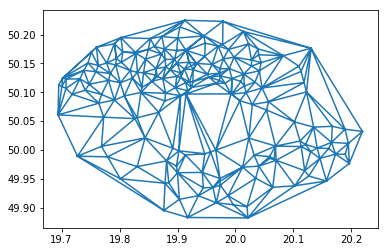

In [14]:
points = [[float(x), float(y)] for x,y in zip(list(df['longitude']), list(df['latitude']))]
points = np.array(points)
tri = Delaunay(points)


plt.triplot(points[:,0], points[:,1], tri.simplices)
#plt.plot(points[:,0], points[:,1], 'o')
plt.show()

## Read airly data from 2017

In [18]:
airly_data = pd.read_csv("data/airly_2017/january-2017.csv")
months = ['february', 'march', 'april', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
for month in months:
    tmp = pd.read_csv(f'data/airly_2017/{month}-2017.csv')
    print(tmp)
    airly_data.append(tmp)

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-02-01T00:00:00            NaN         NaN    101905.0  103.0   
1    2017-02-01T01:00:00            NaN         NaN    101908.0  110.0   
2    2017-02-01T02:00:00            NaN         NaN    101900.0  112.0   
3    2017-02-01T03:00:00            NaN         NaN    101940.0  122.0   
4    2017-02-01T04:00:00            NaN         NaN    101971.0  124.0   
5    2017-02-01T05:00:00            NaN         NaN    102029.0  128.0   
6    2017-02-01T06:00:00            NaN         NaN    102072.0  135.0   
7    2017-02-01T07:00:00            NaN         NaN    102072.0  143.0   
8    2017-02-01T08:00:00            NaN         NaN    102067.0  128.0   
9    2017-02-01T09:00:00            NaN         NaN    102076.0  134.0   
10   2017-02-01T10:00:00            NaN         NaN    102052.0  131.0   
11   2017-02-01T11:00:00            NaN         NaN    102047.0  121.0   
12   2017-02-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-04-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-04-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-04-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-04-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-04-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-04-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-04-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-04-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-04-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-04-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-04-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-04-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-04-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-07-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-07-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-07-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-07-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-07-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-07-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-07-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-07-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-07-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-07-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-07-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-07-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-07-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-09-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-09-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-09-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-09-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-09-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-09-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-09-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-09-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-09-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-09-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-09-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-09-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-09-01T12:00:00            Na

                UTC time  3_temperature  3_humidity  3_pressure  3_pm1  \
0    2017-11-01T00:00:00            NaN         NaN         NaN    NaN   
1    2017-11-01T01:00:00            NaN         NaN         NaN    NaN   
2    2017-11-01T02:00:00            NaN         NaN         NaN    NaN   
3    2017-11-01T03:00:00            NaN         NaN         NaN    NaN   
4    2017-11-01T04:00:00            NaN         NaN         NaN    NaN   
5    2017-11-01T05:00:00            NaN         NaN         NaN    NaN   
6    2017-11-01T06:00:00            NaN         NaN         NaN    NaN   
7    2017-11-01T07:00:00            NaN         NaN         NaN    NaN   
8    2017-11-01T08:00:00            NaN         NaN         NaN    NaN   
9    2017-11-01T09:00:00            NaN         NaN         NaN    NaN   
10   2017-11-01T10:00:00            NaN         NaN         NaN    NaN   
11   2017-11-01T11:00:00            NaN         NaN         NaN    NaN   
12   2017-11-01T12:00:00            Na

In [32]:
def get_data_for_location_number(num):
    columns_to_select = ['UTC time'] + [ col for col in airly_data.columns if col.startswith(str(num))] 
    return airly_data[columns_to_select]

In [38]:
loc3 = get_data_for_location_number('3')

In [52]:
locations[locations['id'] == 3]

,id,latitude,longitude,city,street,number,elevation


In [41]:
loc3.drop(loc3.columns[[1,2]],axis=1, inplace=True)

/home/oswin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
loc3

,UTC time,3_pressure,3_pm1,3_pm25,3_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN
3,2017-01-01T03:00:00,NaN,NaN,NaN,NaN
4,2017-01-01T04:00:00,NaN,NaN,NaN,NaN
5,2017-01-01T05:00:00,NaN,NaN,NaN,NaN
6,2017-01-01T06:00:00,NaN,NaN,NaN,NaN
7,2017-01-01T07:00:00,NaN,NaN,NaN,NaN
8,2017-01-01T08:00:00,NaN,NaN,NaN,NaN
9,2017-01-01T09:00:00,NaN,NaN,NaN,NaN


In [44]:
loc3.describe()

,3_pressure,3_pm1,3_pm25,3_pm10
count,335.000000,335.000000,335.000000,335.000000
mean,102030.895522,111.349254,127.146269,178.758209
std,514.478747,59.618551,71.404637,99.516547
min,100681.000000,21.000000,14.000000,27.000000
25%,101709.000000,58.000000,62.000000,95.000000
50%,102211.000000,107.000000,115.000000,161.000000
75%,102352.000000,155.000000,175.500000,245.000000
max,103081.000000,249.000000,314.000000,440.000000


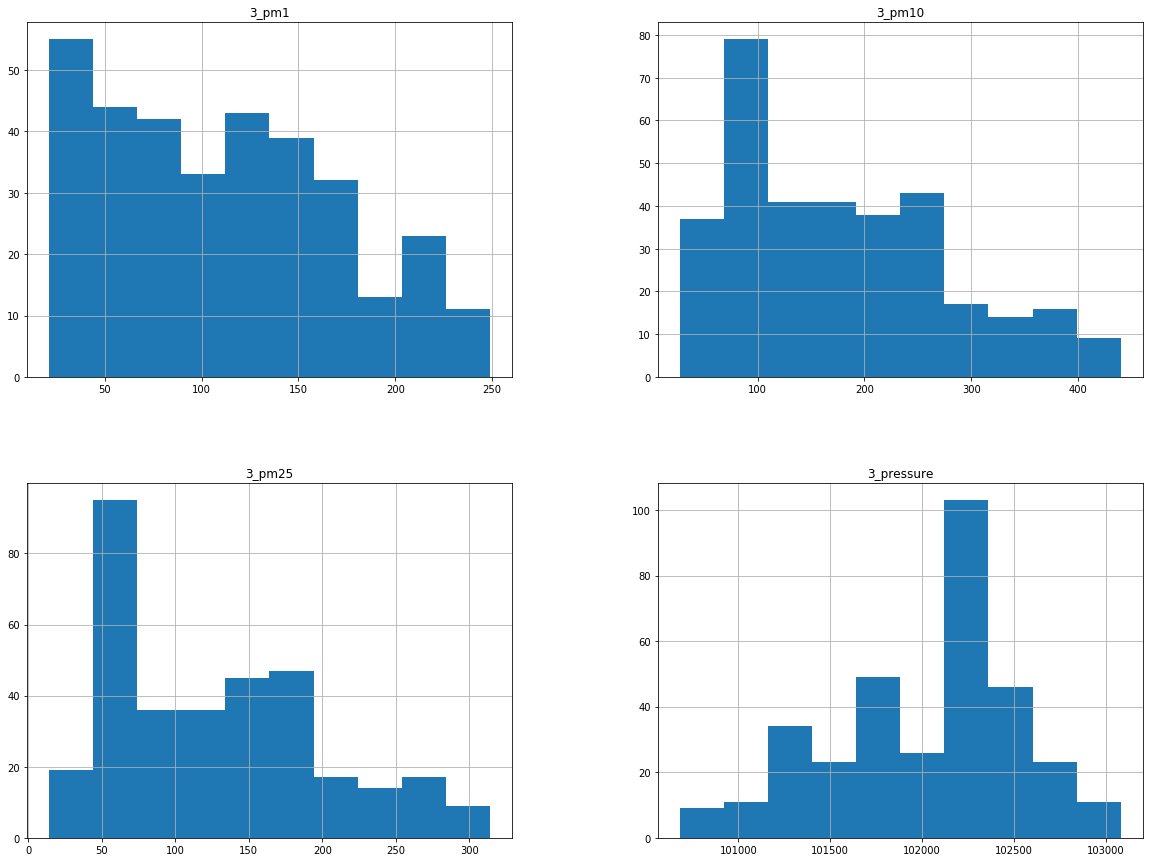

In [49]:
loc3.hist(figsize=(20,15))
plt.show()

In [84]:
tmp = pd.to_datetime(loc3["UTC time"])
loc3 =  loc3.assign(dates= tmp.values)
print(loc3)

               UTC time  3_pressure  3_pm1  3_pm25  3_pm10  \
0   2017-01-01 00:00:00         NaN    NaN     NaN     NaN   
1   2017-01-01 01:00:00         NaN    NaN     NaN     NaN   
2   2017-01-01 02:00:00         NaN    NaN     NaN     NaN   
3   2017-01-01 03:00:00         NaN    NaN     NaN     NaN   
4   2017-01-01 04:00:00         NaN    NaN     NaN     NaN   
5   2017-01-01 05:00:00         NaN    NaN     NaN     NaN   
6   2017-01-01 06:00:00         NaN    NaN     NaN     NaN   
7   2017-01-01 07:00:00         NaN    NaN     NaN     NaN   
8   2017-01-01 08:00:00         NaN    NaN     NaN     NaN   
9   2017-01-01 09:00:00         NaN    NaN     NaN     NaN   
10  2017-01-01 10:00:00         NaN    NaN     NaN     NaN   
11  2017-01-01 11:00:00         NaN    NaN     NaN     NaN   
12  2017-01-01 12:00:00         NaN    NaN     NaN     NaN   
13  2017-01-01 13:00:00         NaN    NaN     NaN     NaN   
14  2017-01-01 14:00:00         NaN    NaN     NaN     NaN   
15  2017

In [78]:
type(loc3["dates"][0])

pandas._libs.tslibs.timestamps.Timestamp

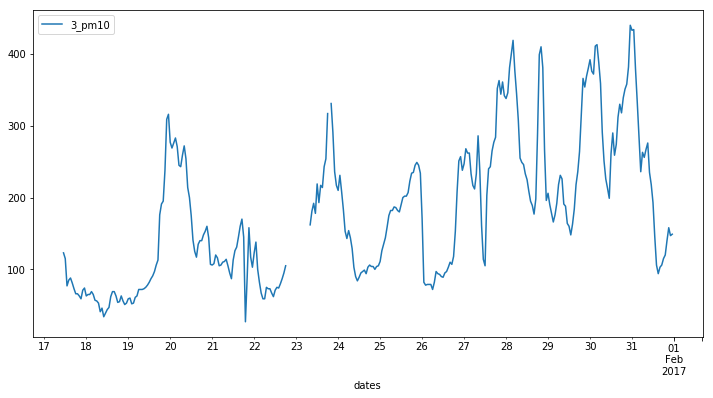

In [76]:
loc3.plot(kind="line",x="dates", y="3_pm10", figsize=(12,6))

## Dla danego przedziału czasu, znajdź największą średnią wartość pm10

In [114]:
start_date = "2017-01-31T11:00:00"
end_date = "2017-01-31T23:00:00"
pm10_columns = ["UTC time"] + [col for col in airly_data.columns if col.endswith("pm10")]
pm10 = airly_data[pm10_columns]
pm10 = pm10[pm10["UTC time"] >= start_date]
pm10 = pm10[pm10["UTC time"] <= end_date]
pm10['mean'] = pm10.mean(axis=1)
mean_values = pd.DataFrame(pm10.mean(axis=0))
mean_values.columns = ["mean_pm10"]
mean_values[mean_values["mean_pm10"] == mean_values["mean_pm10"].max()]

,mean_pm10
202_pm10,182.076923
